In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Generating data

In [100]:
sample_size = int(1e3);
x = np.linspace(0,1, num=sample_size);
y = np.sin(2*np.pi*x)
data = np.sin(2*np.pi*x) + np.random.normal(size=sample_size,scale=0.35);
#data = np.sin(2*np.pi*x) + (np.e**x)*1.7 + np.random.normal(size=sample_size,scale=0.35);

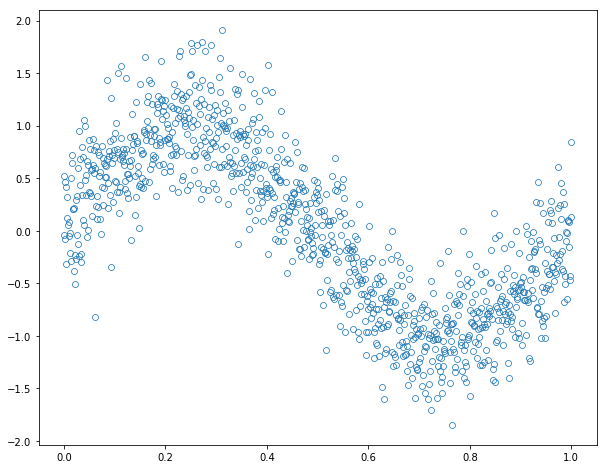

In [101]:
plt.figure(figsize=(10,8))
plt.plot(x,data,'o',markerfacecolor='none',markeredgewidth=0.75);
#plt.show();

#### Splitting data

In [102]:
obs = np.zeros((10,1000));
obs[:] = np.nan

#Ensure the non-repetition

for i in range(10):
    np.random.seed(i**2)
    rnd_index = np.arange(1000)
    np.random.shuffle(rnd_index)
    rnd_index = rnd_index[:100]
    
    for j in rnd_index:
        obs[i][j] = data[j]
        #print(obs[i])

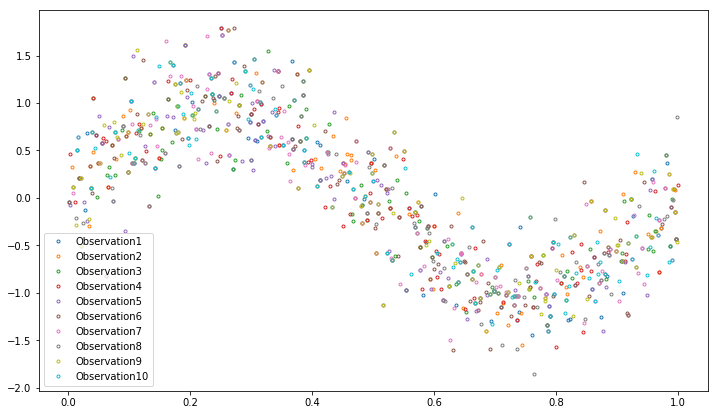

In [103]:
plt.figure(figsize=(12,7));
for i in range(10):
    legend = "Observation"+str(i+1)
    plt.plot(x,obs[i],'.',markerfacecolor='none',markeredgewidth=1, label=legend)
    plt.legend()
    #plt.grid(True)

#### Defining the function

Now, we'll see the problem of $ y(\boldsymbol{x},\boldsymbol{w}) = w_0 + w_1 x^1 + ... + w_D x^D $ and make some changes. Let's choose some arbitrary function class $ \phi(x) $ and then, our previous relation becomes $ y(\boldsymbol{x},\boldsymbol{\phi}) = w_0 + w_1 \phi_1 + ... + w_D \phi_D $, such that $ \phi_i $ are apparently linearly independent. So, in this example we'll choose the function $$ \phi_i = \exp \left( -\frac{(x-\mu_i)^2}{s^2} \right) $$

Defining the model matrix

<font color="red">Missing to define the covariance matrix $\sum ^{-1}$ and replace it in $ s $</font>

In [95]:
M = 10

def f_phi(x,mu,s=1):
    aux = x-mu
    return np.e**(-(np.dot(aux,aux.T)) / s**2)

In [96]:
N = 3

phi = np.zeros((M,N))

In [97]:
for i in range(M):
    for j in range(N):
        phi[i][j] = f_phi(df[i:i+1][~np.isnan(df)],j)

print(phi)

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]
